In [1]:

import pandas as pd
import numpy as np

import pywt
import cv2

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)


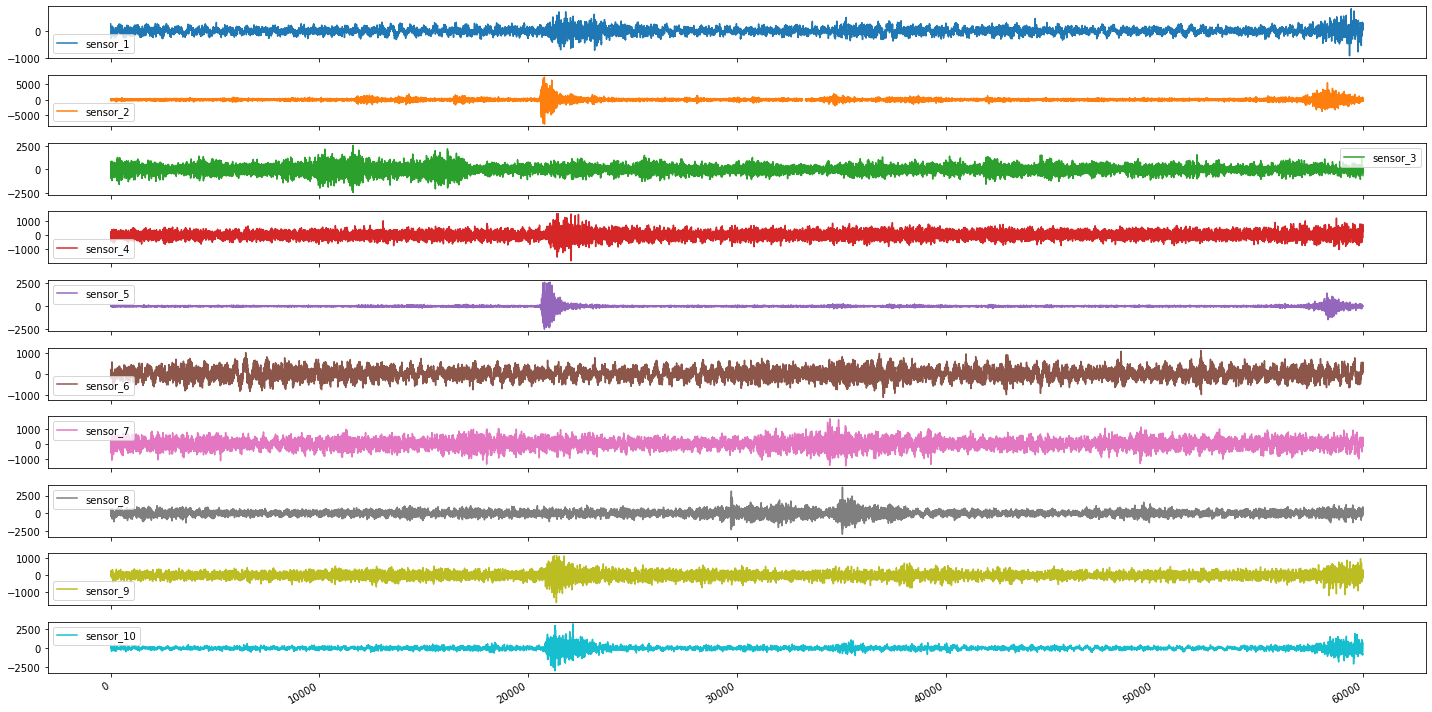

In [2]:
data_sensors = pd.read_csv("1000015382.csv")

data_sensors.plot(subplots=True)

plt.tight_layout()
plt.show()

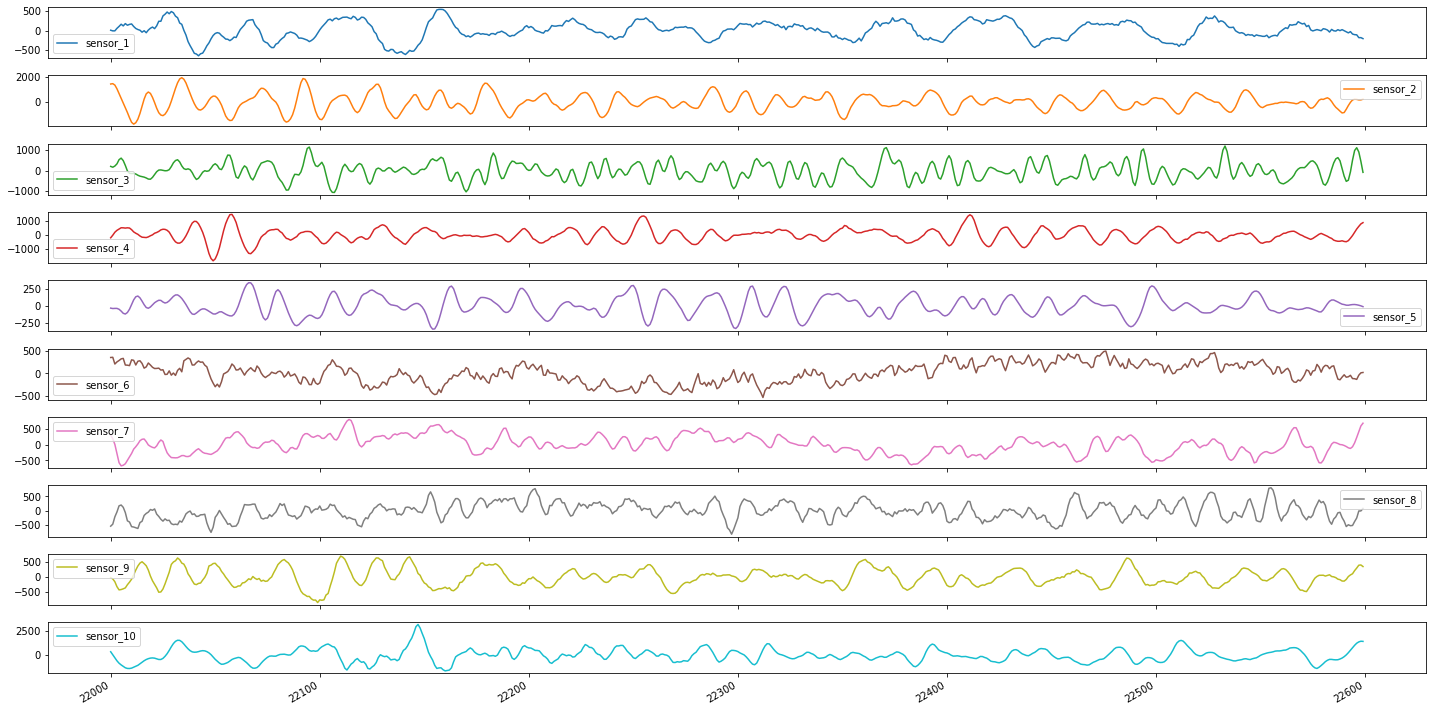

In [3]:
data_sensors[22000:(22000 + (10*60))].plot(subplots=True)

plt.tight_layout()
plt.show()

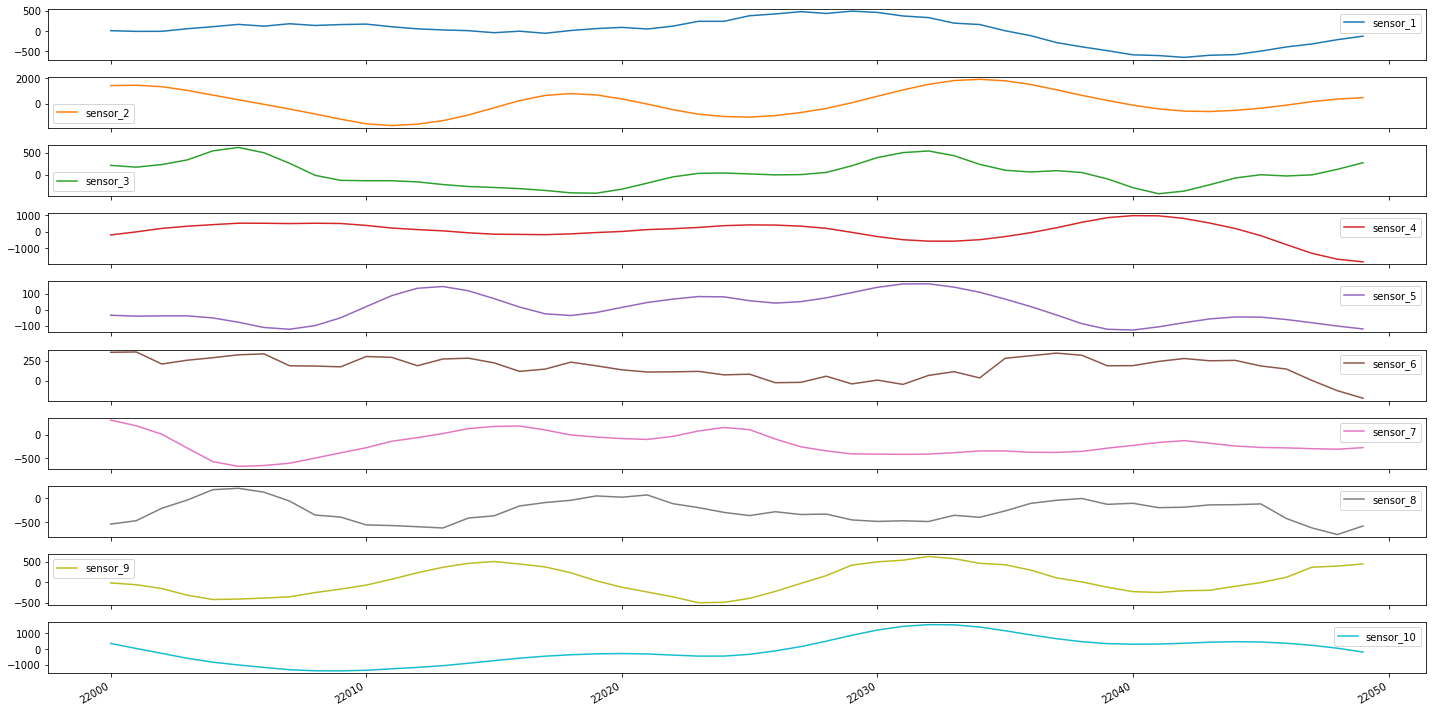

In [4]:
data_sensors[22000:(22000 + (10*5))].plot(subplots=True)

plt.tight_layout()
plt.show()

In [5]:
from v_cwt import pd_to_cwt_list

trans = pd_to_cwt_list(data_sensors)

sensor_1
sensor_2
sensor_3
sensor_4
sensor_5
sensor_6
sensor_7
sensor_8
sensor_9
sensor_10


In [6]:
print(trans)
print([x.shape for x in trans])

[array([[ -3.2921333, -34.383034 ,  -5.30847  , ...,  -7.409687 ,
         14.132168 ,  -4.827452 ],
       [  6.4351707,  38.534912 , -42.766396 , ...,  24.404144 ,
        -41.33505  ,  25.912634 ],
       [ -9.069725 ,  96.197914 ,  20.97031  , ...,   1.4978535,
        -35.37453  ,  15.074784 ],
       ...,
       [284.36636  , 131.8359   , 200.1411   , ..., 866.15533  ,
        798.15656  , 650.32025  ],
       [215.43327  , 210.61043  , 291.98795  , ..., 868.5788   ,
        866.8327   , 653.3486   ],
       [255.99367  , 190.30203  , 255.3002   , ..., 765.3973   ,
        845.7193   , 789.1885   ]], dtype=float32), array([[ 1.4004022e+01, -3.1706619e-01, -1.8125597e+01, ...,
        -1.6185471e+01,  1.2680851e+01,  6.0584175e+01],
       [-7.6355786e+00,  1.9098576e+00, -6.6309822e-01, ...,
         8.5711679e+00,  3.9266418e+01, -6.6145737e+01],
       [-3.9448925e+01, -1.5090908e+01,  4.0487190e+01, ...,
         1.1418564e+02,  1.5835608e+01, -1.5573720e+02],
       ...,
    

In [7]:
tmp_hists = [np.histogram(x, bins = 5) for x in trans]

for i,x in enumerate(tmp_hists):
    print(f">>>>> {i}")
    print(x[0])
    print(x[1])

>>>>> 0
[    8314   356931 14504021   421918     9071]
[-2939.318   -1769.8213   -600.32446   569.17236  1738.6692   2908.166  ]
>>>>> 1
[      94     7210 15282698    10148      105]
[-21881.129  -13209.4     -4537.673    4134.0557  12805.783   21477.512 ]
>>>>> 2
[     255    37302 15228851    33612      235]
[-8467.3    -5067.046  -1666.7916  1733.4625  5133.717   8533.971 ]
>>>>> 3
[     194    52486 15202172    45223      180]
[-5948.793  -3557.994  -1167.1947  1223.6044  3614.4036  6005.2026]
>>>>> 4
[     170     4482 15289991     5413      199]
[-7957.738  -4805.514  -1653.2903  1498.9333  4651.157   7803.381 ]
>>>>> 5
[   21732   942079 12641924  1649547    44973]
[-4012.9412  -2452.723    -892.5045    667.71375  2227.9321   3788.1504 ]
>>>>> 6
[    8684   573961 14344349   366989     6272]
[-5901.588  -3499.7664 -1097.945   1303.8766  3705.698   6107.5195]
>>>>> 7
[      38   437225 14470729   392227       36]
[-6313.189  -3779.2554 -1245.3215  1288.612   3822.546   6356.4795

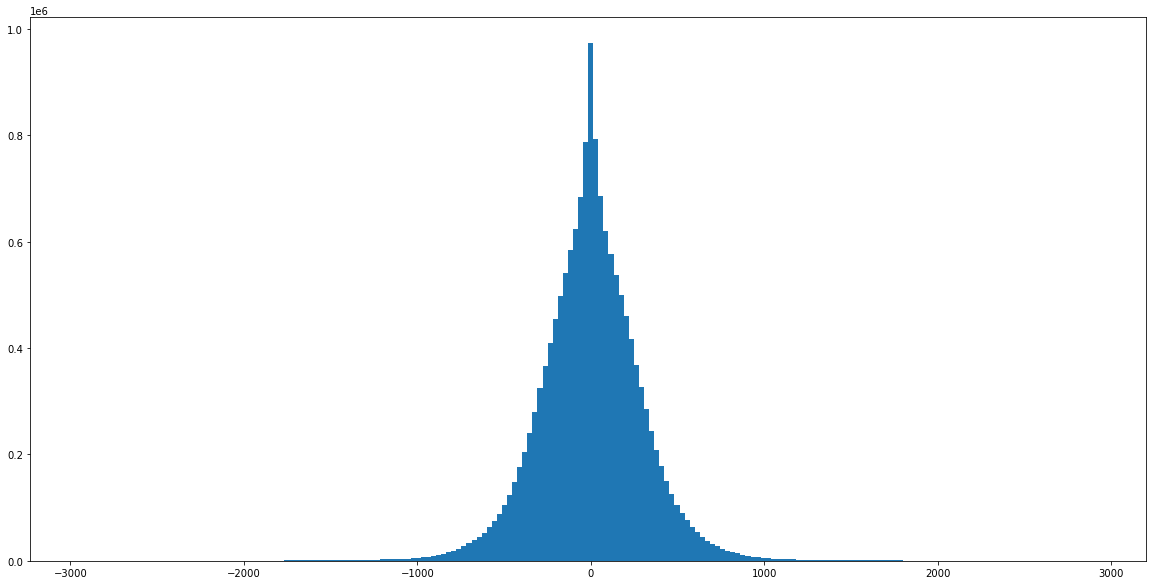

In [8]:
plt.hist(trans[0].flatten(), bins = 200)
plt.show()

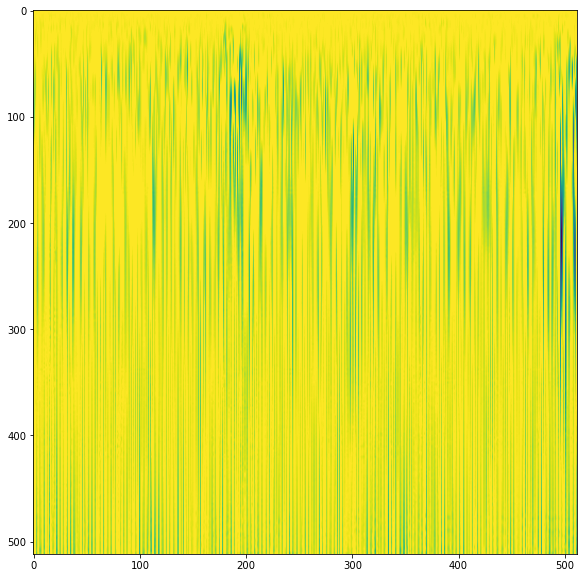

In [9]:
tmp = trans[0].copy()
tmp[tmp < 0] = 0
plt.imshow(cv2.resize(1-tmp, (512, 512)))
plt.show()

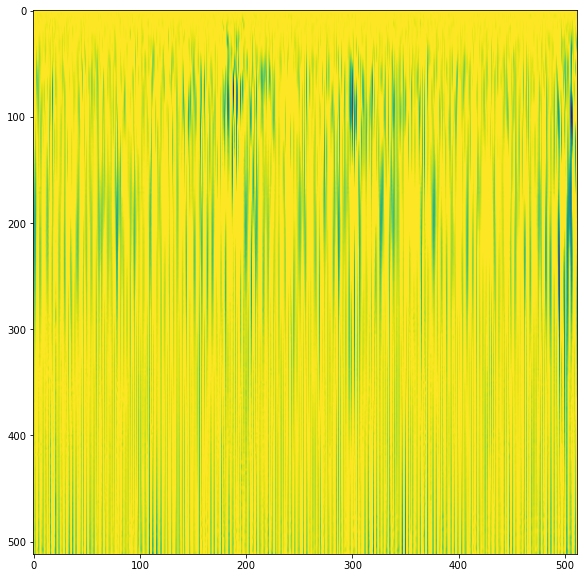

In [10]:
tmp = trans[0].copy()
tmp[tmp > 0] = 0
plt.imshow(cv2.resize(tmp, (512, 512)))
plt.show()

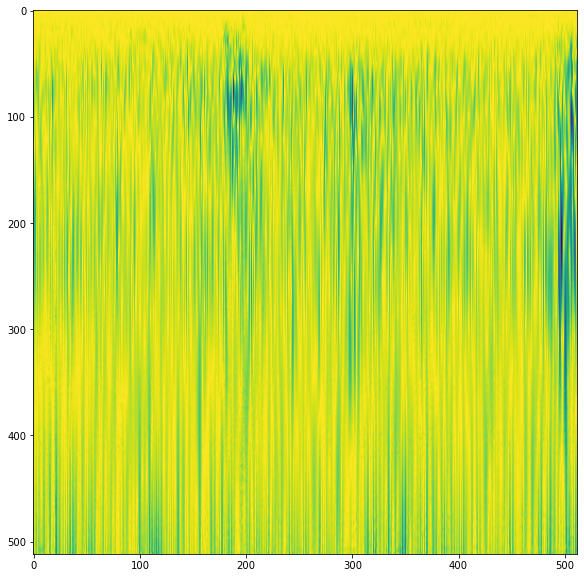

In [11]:
tmp = trans[0].copy()
plt.imshow(cv2.resize(-np.abs(tmp), (512, 512)))
plt.show()

In [12]:
def arr_to_uint(arr):
    # This function asumes that the array contains values
    # from -1 to 1
    # This would make this be scaled around 128
    scaled_mat = (128 + 127*arr)
    scaled_mat = scaled_mat.astype(np.uint8)
    return scaled_mat


def norm_v1(x, reshape_size = (1024, 256)):
    resized = cv2.resize(x, reshape_size)
    cuberooted = np.cbrt(resized)
    abs_max = np.max(np.abs(np.nan_to_num(cuberooted)))
    
    # This would make the limit either -1 or 1
    scaled_mat = np.nan_to_num(cuberooted)/abs_max
    
    return(scaled_mat)


def norm_arr(x, reshape_size = (1024, 256)):
    resized = cv2.resize(x, reshape_size)
    abs_arr = np.abs(np.nan_to_num(resized))
    abs_max = abs_arr / np.std(abs_arr)
    
    # This would make the limit from 0 to 1
    # And censoring the upper limit at 4 standard deviations
    abs_max = abs_max / 4
    abs_max[abs_max > 1] = 1
    
    return(abs_max)


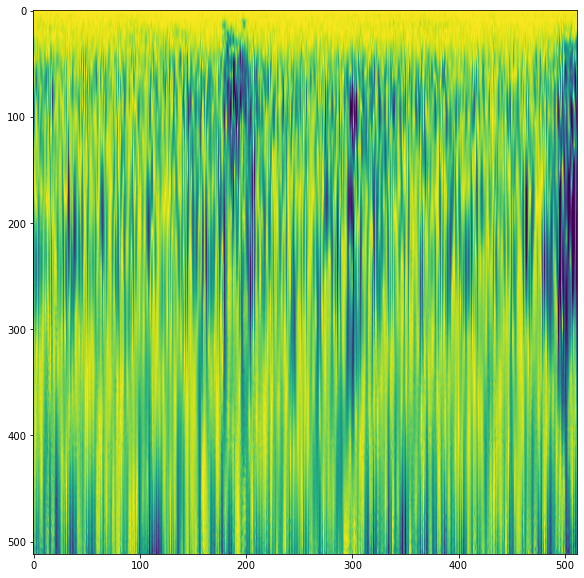

In [13]:
plt.imshow(cv2.resize(-norm_arr(trans[0]), (512, 512)))
plt.show()

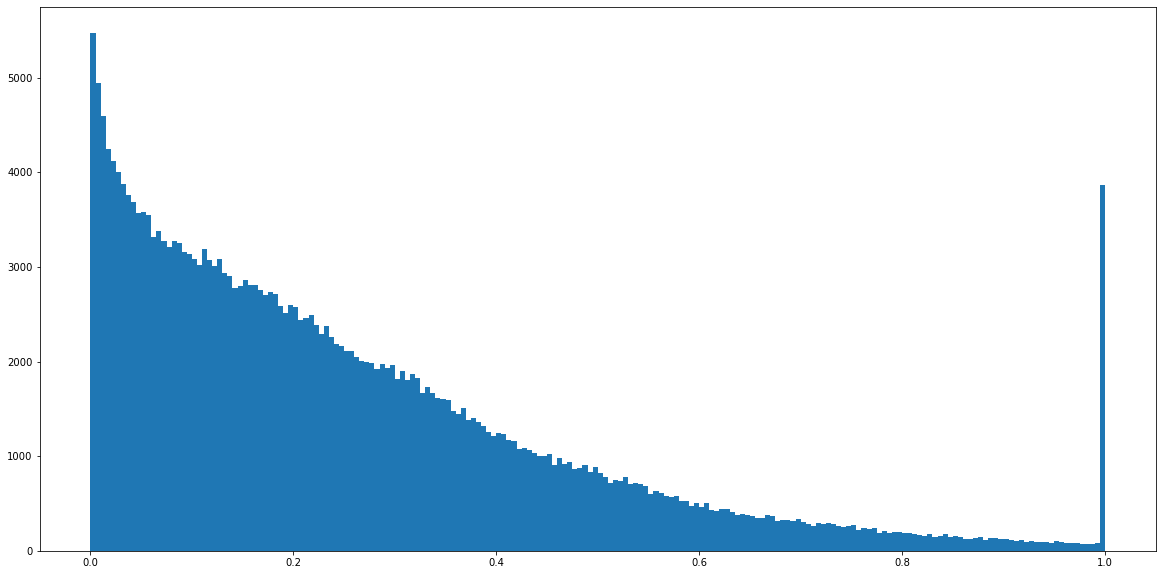

In [14]:
plt.hist(norm_arr(trans[0]).flatten(), bins = 200)
plt.show()

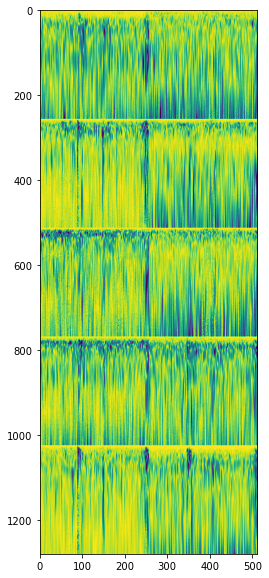

In [15]:
norm_trans = [norm_arr(x, (256, 256)) for x in trans]
full = cv2.hconcat([cv2.vconcat(norm_trans[:5]), cv2.vconcat(norm_trans[5:])])

plt.imshow(-full)
plt.show()

In [16]:
np.stack([norm_arr(x).astype(np.float32) for x in trans], axis = -1).shape

(256, 1024, 10)

In [17]:
from v_cwt import file_to_cwt_list

np.stack([norm_arr(x).astype(np.float32) for x in file_to_cwt_list("1000015382.csv")], axis = -1).shape

sensor_1
sensor_2
sensor_3
sensor_4
sensor_5
sensor_6
sensor_7
sensor_8
sensor_9
sensor_10


(256, 1024, 10)